In [294]:
import math
import cv2
import numpy as np
import tensorflow as tf

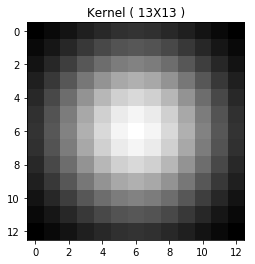

In [295]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), (size // 2), size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title(f"Kernel ( {size}X{size} )")
        plt.show()

    return kernel_2D

    
def gaussian_blur(kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return kernel

kernel = gaussian_blur(13, verbose=True)

In [296]:
def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

In [297]:
img = read_img("./data/11f3bd8.png")
print(img.shape)

(512, 512, 1)


In [298]:
k = np.reshape(kernel, [kernel.shape[0], kernel.shape[1], 1, 1]) 
i = tf.reshape(img, [1, img.shape[0], img.shape[1], 1], name='image')

conv = tf.nn.conv2d(i, k, [1, 1, 1, 1], "SAME")

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(kernel, interpolation='none', cmap='gray')
ax[1].imshow(tf.reshape(img, (img.shape[0], img.shape[1])))
ax[2].imshow(tf.reshape(conv[0], (conv.shape[1], conv.shape[2])))